In [1]:
import pandas as pd 
import numpy as np 
import os
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('tagsets')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MAGI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\MAGI\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MAGI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\MAGI\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [1]:
from matplotlib.pyplot import imshow
%matplotlib inline

What are the preprocessing steps to get clean text data?
1. Transforming the text into a "corpus";
2. Tokenizing;
3. Removing punctuations;
4. Removing/replacing specific characters (highly recommended);
5. Replacing accents (depending on language);
6. Removing stop words;
7. Lemmatization;
8. Stemming (optional)  

All of these is part of what we call `Natural Language Processing`, which leads to `Natural Language Understanding`.

Before getting started, let's introduce a basic concept: **The Corpus**  
- A corpus or text corpus is a ***large and structured set of texts*** from which we perform our analysis;
- Within each corpus we will have separate documents, which might be articles, stories, or book volumes, each document is treated as a separate entity or record.

# Part I - Apply every step of text processing to your reviews

### 1. Read texts from restaurant comments file

In [2]:
text_data = pd.read_csv(os.getcwd()+'/Allresto.csv',encoding='ISO-8859-1',engine = 'python')

In [3]:
text_data

,Restaurant Name,Review ID,Date,Content,Rating
0,Madhu's,739447935,20-Jan,The food was absolutely wonderful from prepara...,5
1,Madhu's,739773109,20-Jan,The food was amazing. Our waiter Franco was ex...,5
2,Madhu's,738529074,20-Jan,It was an awesome experience dining at the res...,5
3,Madhu's,739981237,20-Jan,"Excellent service, excellent food and great am...",5
4,Madhu's,740251404,20-Jan,Food was good cannot say too good but staff an...,4
...,...,...,...,...,...
9989,Bistro Benito,173256622,13-Aug,"A little cramped, a little dated in decor, but...",4
9990,Bistro Benito,177905225,13-Sep,"Good Italian food, and a great staff. The owne...",4
9991,Bistro Benito,180172952,13-Sep,Maybe we visited on a bad night but I can't se...,2
9992,Bistro Benito,177699004,13-Sep,We went after seeing other reviews while on a ...,4


### 2. Removing punctuations and accents

In [4]:
import re

In [5]:
characters_to_remove = ["@", "/", "#", ".", ",", "!", "?", "(", ")", "-", "_", "\"", ":"]
transformation_dict = {initial:" " for initial in characters_to_remove}

In [6]:
transformation_dict

{'@': ' ',
 '/': ' ',
 '#': ' ',
 '.': ' ',
 ',': ' ',
 '!': ' ',
 '?': ' ',
 '(': ' ',
 ')': ' ',
 '-': ' ',
 '_': ' ',
 '"': ' ',
 ':': ' '}

In [7]:
with_accent = ['é', 'è', 'ê','à','ù','ô']
without_accent = ['e', 'e','e', 'a','u','o']
accent_dict = {before:after for before, after in zip(with_accent, without_accent)}

### 3. Replace contractions

In [8]:
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

In [9]:
def _get_contractions(contraction_dict):
    contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
    return contraction_dict, contraction_re
contractions, contractions_re = _get_contractions(contraction_dict)

In [10]:
def replace_contractions(text):
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, text)

### 4. Preserve only strings with letters and numbers; using TweetTokenizer to prevent spliting 's

**Tokenization**: tokenization is the process of **breaking a stream of text** into words, phrases, symbols, or other meaningful elements called tokens.
- 1st level: considering a sentence as a token
- 2nd level: considering the word as a token (we split the document word by word)
- 3rd level: N-grams (we consider few words together)

In [11]:
from nltk.tokenize import TweetTokenizer

In [12]:
def filter(x):
    y = x.translate(str.maketrans(transformation_dict))
    z = y.translate(str.maketrans(accent_dict)) 
    w = re.sub('[^A-Za-z0-9\']+', ' ', z)
    v = replace_contractions(w)
    clean_text = v.lower()
    return clean_text
text_data['Review_filtered'] = text_data.Content.apply(lambda x:filter(x))

In [13]:
text_data['Review_split'] = text_data.Review_filtered.apply(lambda x:TweetTokenizer().tokenize(str(x)))

In [14]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet

### 5. Lemmatize nouns, verbs, adjectives and adverbs accordingly by using parts-of-speech

**Infected Language**: in grammar, inflection is **the modification of a word to express different grammatical categories** such as tense, case, voice, aspect, person, number, and gender. An inflection expresses one or more grammatical categories with a prefix, suffix or infix, or another internal modification such as a vowel change. 

**Stemming**: 
- Stemming is **the process of reducing inflection in words to their root forms** such as mapping a group of words to the same stem even if the stem itself is not a valid word in the language
- By removing inflectional form of a word we focus on the **meaning**
- "Rude" process in the sense that it could remove the end of a word even if it is not an inflectional form

**Lemmatization**:
- Lemmatization, unlike Stemming, reduces the inflected words properly ensuring that the root word belongs to the language
- In Lemmatization root word is called **Lemma**
- A trivial way to do **lemmatization** is by simple **dictionary lookup**. It is also the most common way

**Trade-off between stemming & lemmatization**:
- Stemmers are faster, and can better reduce vocabulary size
- Lemmatizers ensure you work with existing words, and deal with special cases
- More about this: http://stackoverflow.com/questions/17317418/stemmers-vs-lemmatizers

In [15]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [16]:
lemmatizer = WordNetLemmatizer()
def stem(words):
    stem=[]
    for word, tag in nltk.pos_tag(words):
        if tag.startswith("NN"):
            stem.append(lemmatizer.lemmatize(word, wordnet.NOUN))
        elif tag.startswith('VB'):
            stem.append(lemmatizer.lemmatize(word, wordnet.VERB))
        elif tag.startswith('JJ'):
            stem.append(lemmatizer.lemmatize(word, wordnet.NOUN))
        elif tag.startswith('RB'):
            stem.append(lemmatizer.lemmatize(word, wordnet.ADJ))
        else:
            stem.append(word)
    return stem 
text_data['Review_Stem'] = text_data.Review_split.apply(lambda x:stem(x))

### 6. Filter all stop words

In [17]:
from stop_words import get_stop_words
stop_words = get_stop_words('en')
my_stop_words = []
all_stop_words =  stop_words + my_stop_words

In [18]:
def filter_stopwords(words):
     return [word for word in words if word not in all_stop_words] 
text_data['Review-stopword'] = text_data.Review_Stem.apply(lambda x:filter_stopwords(x))

In [19]:
text_data.head()

,Restaurant Name,Review ID,Date,Content,Rating,Review_filtered,Review_split,Review_Stem,Review-stopword
0,Madhu's,739447935,20-Jan,The food was absolutely wonderful from prepara...,5,the food was absolutely wonderful from prepara...,"[the, food, was, absolutely, wonderful, from, ...","[the, food, be, absolutely, wonderful, from, p...","[food, absolutely, wonderful, preparation, pre..."
1,Madhu's,739773109,20-Jan,The food was amazing. Our waiter Franco was ex...,5,the food was amazing our waiter franco was exc...,"[the, food, was, amazing, our, waiter, franco,...","[the, food, be, amaze, our, waiter, franco, be...","[food, amaze, waiter, franco, exceptional, att..."
2,Madhu's,738529074,20-Jan,It was an awesome experience dining at the res...,5,it was an awesome experience dining at the res...,"[it, was, an, awesome, experience, dining, at,...","[it, be, an, awesome, experience, dining, at, ...","[awesome, experience, dining, restaurant, thur..."
3,Madhu's,739981237,20-Jan,"Excellent service, excellent food and great am...",5,excellent service excellent food and great amb...,"[excellent, service, excellent, food, and, gre...","[excellent, service, excellent, food, and, gre...","[excellent, service, excellent, food, great, a..."
4,Madhu's,740251404,20-Jan,Food was good cannot say too good but staff an...,4,food was good cannot say too good but staff an...,"[food, was, good, cannot, say, too, good, but,...","[food, be, good, cannot, say, too, good, but, ...","[food, good, say, good, staff, service, excell..."


### 7. Plot General Word Frequency

In [20]:
reviews = text_data['Review-stopword'].to_list()
all_words= [word for review in reviews for word in review]

In [21]:
from collections import Counter
word_frequency = Counter(all_words).most_common()
frequency = dict(word_frequency)

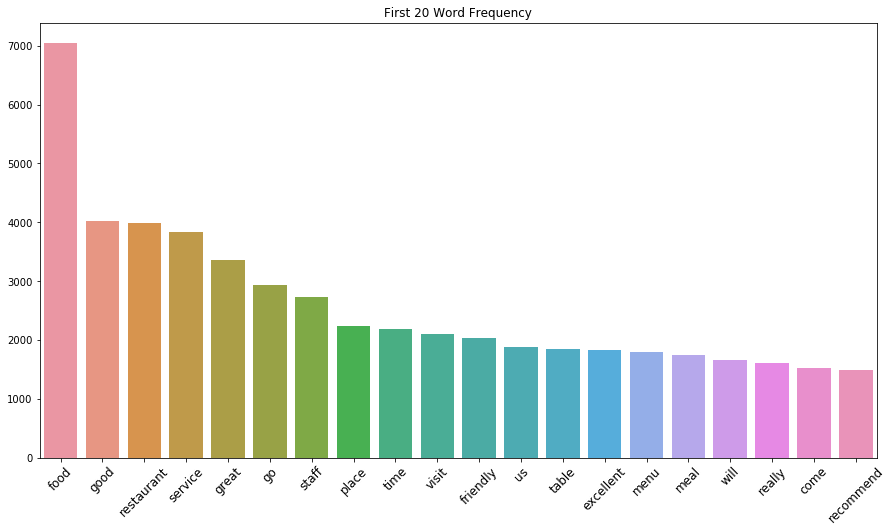

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
f = plt.figure(figsize=(15,8))
sns.barplot(x = list(frequency.keys())[0:20],y = list(frequency.values())[0:20])
plt.title("First 20 Word Frequency")
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

### Text Representation: Bag-of-words
**Principle**:
- Consider a corpus of documents, each **document** is a text
- Each document contains a certain number of **words** for which we can do **tokenization**
- Each word, or group of words will be a **token** (monogram, bigram, ...)
- **Bag-of-word**: Representation of the document by a numerical vector containing the counts of each token  

Each word will be considered individually, **whatever its place in the sentence**.

**Description**:
- To get the most important topics in a collection of documents, a natural thing would be to look at the words and compare their occurrences.
- The Document Term Matrix synthetizes the words’ occurrences in a collection of documents.
- Rows correspond to documents and columns correspond to tokens.

### Text Representation: TF-IDF
A score that better reflects how words are related to documents within a corpus:
$$tfidf(t, d)=tf(t, d)\times idf(t)$$
**Term frequency**: We have different possibilities to calculate the term frequency. The most frequent are raw count and term frequency.  
**Inverse document frequency**: A measure of how much information the word provides, i.e., if it's common or rare across all documents. It diminishes the weight of terms that occur very frequently in the document set and increases the weight of terms that occur rarely.  
Formula of Inverse Document Frequency: 
$$idf(t)=log|\frac{n}{\{d\in D:t\in d\}}|$$
With 𝑛 the total number of documents, 𝐷 the set of all documents, 𝑑 a given document in 𝐷, 𝑡 is a given
term.
Thus, {𝑑 ∈ 𝐷: 𝑡 ∈ 𝑑} is the number of documents in which the term 𝑡 appears.

# Part II - Create a TF-IDF Matrix with all the reviews scrapped on the web

### 8. Using TF-IDF vector

In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [122]:
reviews = text_data['Review-stopword'].to_list()
tokenized_reviews= [review for review in reviews]

In [124]:
def identity_tokenizer(text):
    return text

tfidf = TfidfVectorizer(tokenizer=identity_tokenizer,lowercase=False)    
tfidf_matrix = tfidf.fit_transform(tokenized_reviews)

In [126]:
word_list = tfidf.get_feature_names()
mean_tfidf = np.mean(tfidf_matrix,axis=0).ravel().tolist()[0]
avg_tfidf = dict(sorted(zip(word_list,mean_tfidf),key = lambda x: x[1],reverse=True))

In [127]:
print(len(word_list))
print(len(mean_tfidf))

11770
11770


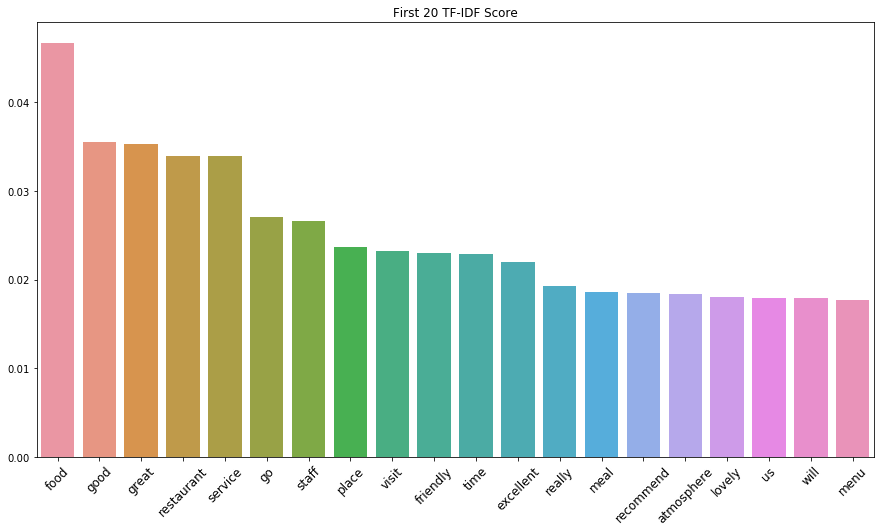

In [128]:
f = plt.figure(figsize=(15,8))
sns.barplot(x = list(avg_tfidf.keys())[0:20],y = list(avg_tfidf.values())[0:20])
plt.title("First 20 TF-IDF Score")
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

Text(0.5, 1.0, 'TF-IDF score of each word (Sorted)')

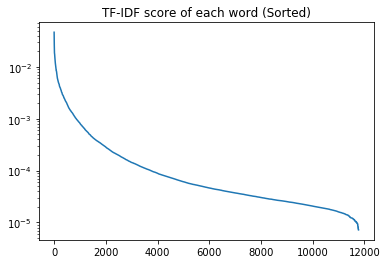

In [130]:
fgrid = sns.lineplot(x = np.arange(len(list(avg_tfidf.values()))), y = list(avg_tfidf.values()))
ax = fgrid.axes
ax.set_yscale('log')
ax.set_title('TF-IDF score of each word (Sorted)')

Text(0.5, 1.0, 'Accumulated TF-IDF score of each comment (Sorted)')

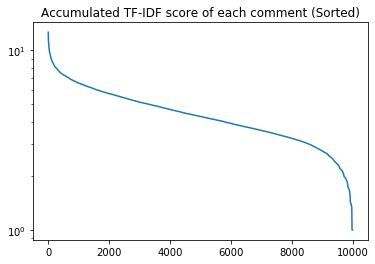

In [135]:
mean_tfidf2 = np.sum(tfidf_matrix,axis=1).ravel().tolist()[0]
avg_tfidf2 = dict(sorted(zip(np.arange(len(mean_tfidf2)),mean_tfidf2),key = lambda x: x[1],reverse=True))

fgrid = sns.lineplot(x = np.arange(len(list(avg_tfidf2.values()))), y = list(avg_tfidf2.values()))
ax = fgrid.axes
ax.set_yscale('log')
ax.set_title('Accumulated TF-IDF score of each comment (Sorted)')

#### Visualize a comment with TF-IDF score of each word (Incomplete)

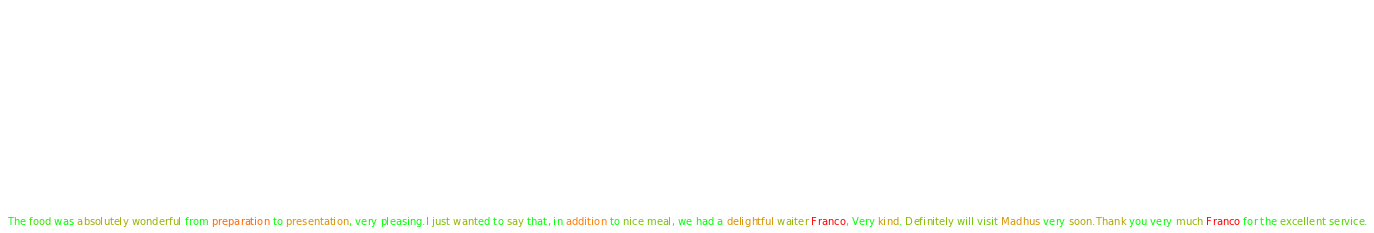

In [161]:
i = 0
content = text_data['Content'].to_list()[i]
intensity = np.zeros(len(content))
tfidf_dict = {}
for i_d, i_sparse in enumerate(tfidf_matrix[i].indices):
    word = word_list[i_sparse]
    score = tfidf_matrix[i].toarray()[0][i_sparse]
    position = -len(word)
    while True: 
        position = content.lower().find(word, position+len(word)) 
        #print(position)
        if position != -1:
            intensity[position:position+len(word)] = score
        else:
            break

lc = []
for it in intensity:
    lc.append((min(1, 4*it), max(0, 1 - 2 * it), 0))

import matplotlib.pyplot as plt
from matplotlib import transforms
t = plt.gca().transData
fig = plt.gcf()
plt.axis('off')

for idx, (s,c) in enumerate(zip(content,lc)):
    text = plt.text(0,0,s, transform=t, color = c)
    #text = plt.text(0,0,s, transform=t, backgroundcolor=c)
    text.draw(fig.canvas.get_renderer())
    ex = text.get_window_extent()
    t = transforms.offset_copy(text._transform, x=ex.width, units='dots')



![part1](Review_part_1.png)
![part2](Review_part_2.png)
![part3](Review_part_3.png)

**Comment**: from the visualization we noticed that `Franco`, `preparation` and `addition` (with red or orange colors) have high TF-IDF values, meaning that they are good at distinguishing different reviews.

### 9. Import background picture to plot word frequency

In [72]:
from wordcloud import WordCloud
from PIL import Image

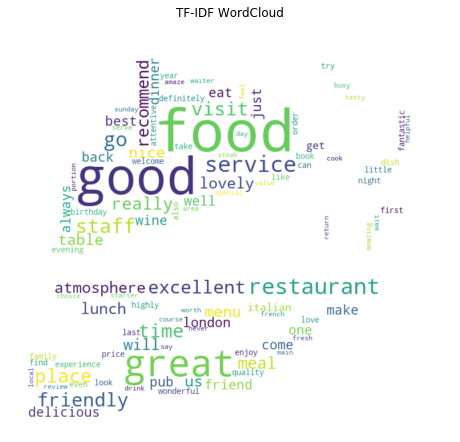

In [73]:
mask = np.array(Image.open("cook.jpg"))
wc = WordCloud(background_color="white", max_words=100, mask=mask)
        # generate word cloud
wc.generate_from_frequencies(avg_tfidf)
f = plt.figure(figsize=(8,8))
plt.title("TF-IDF WordCloud")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

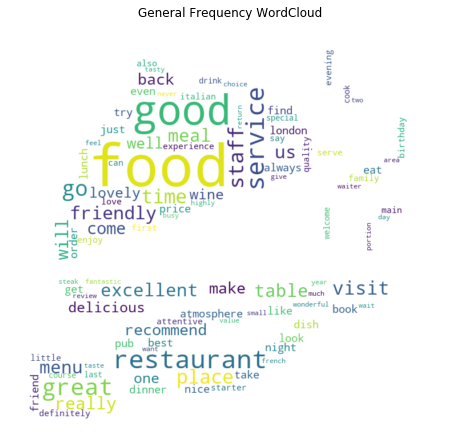

In [74]:
mask = np.array(Image.open("cook.jpg"))
wc = WordCloud(background_color="white", max_words=100, mask=mask)
        # generate word cloud
wc.generate_from_frequencies(frequency)
f = plt.figure(figsize=(8,8))
plt.title("General Frequency WordCloud")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# Part III - Bonus Questions

### 10. Question 1

In [32]:
characters_to_remove = ["@", "/", "#", ".", ",", "!", "?", "(", ")", "-", "_", "\"", ":"]
transformation_dict = {initial:" " for initial in characters_to_remove}
with_accent = ['é', 'è', 'ê','à','ù','ô']
without_accent = ['e', 'e','e', 'a','u','o']
accent_dict = {before:after for before, after in zip(with_accent, without_accent)}

def filter(x):
    x = x.translate(str.maketrans(transformation_dict)).translate(str.maketrans(accent_dict)).lower()
    x = re.sub('[^A-Za-z0-9\']+', ' ', x)
    contractions_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
    def replace(match):
        return contractions[match.group(0)]
    x = contractions_re.sub(replace, x)
    x = TweetTokenizer().tokenize(str(x))
    lemmatizer = WordNetLemmatizer()
    x1 = ''
    for word, tag in nltk.pos_tag(x):
        if tag.startswith("NN"):
            x1 = x1+(lemmatizer.lemmatize(word, wordnet.NOUN))+' '
        elif tag.startswith('VB'):
            x1 = x1+(lemmatizer.lemmatize(word, wordnet.VERB))+' '
        elif tag.startswith('JJ'):
            x1 = x1+(lemmatizer.lemmatize(word, wordnet.ADJ))+' '
        elif tag.startswith('RB'):
            x1 = x1+(lemmatizer.lemmatize(word, wordnet.ADV))+' '
        else:
            x1 = x1+(lemmatizer.lemmatize(word))+' '

    return x1


In [33]:
text_data['Bonus1'] = text_data.Content.apply(lambda x:filter(x))

In [34]:
text_data.iloc[17,9]

"weekday service be much quick staff be great i would give 5 star to rahul there who serve u i would suggest pre book for weekend park be at a little walk but it a very busy area so cant complaint if use park facility do not forget to let staff know about your car registration a soon you arrive at madhu's "

### 11. Question 2

In [35]:
from stop_words import get_stop_words
from collections import Counter

stop_words = get_stop_words('en')
my_stop_words = []
all_stop_words =  stop_words + my_stop_words


def plot_wordcloud(y):
    list_corpus= y.to_list()
    whole_corpus = ' '.join(list_corpus)
    whole_text = nltk.word_tokenize(str(whole_corpus))
    words = [word for word in whole_text if word not in all_stop_words] 
     
    word_frequency = Counter(words).most_common()
    frequency = dict(word_frequency)   
         
    mask = np.array(Image.open("capgemini.jpg"))
    wc = WordCloud(background_color="white", max_words=100, mask=mask)
            # generate word cloud
    wc.generate_from_frequencies(frequency)
    f = plt.figure(figsize=(8,8))
    plt.title("Frequency WordCloud")
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

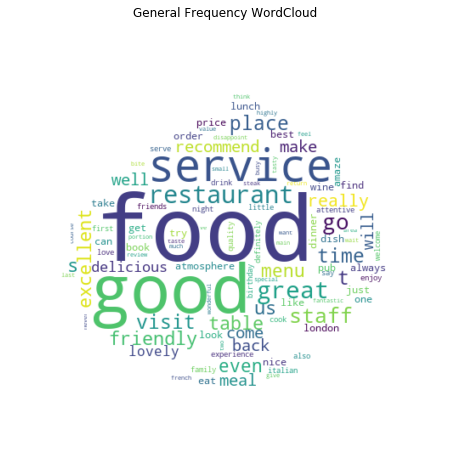

In [48]:
plot_wordcloud(text_data['Bonus1'])